In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# util functions for this coursework
def am_glcm_faster( img , GL , d , t):
    ccmm = np.zeros([GL, GL])
    if t==0:
        im_target = img[:,d:]
        im_value = img[:,:-d]
    # Use the above example and write your code for t = 45,90,135
    elif t==45:
        im_target = img[d:, d:]
        im_value = img[:-d, :-d]
    elif t==90:
        im_target = img[d:, :]
        im_value = img[:-d, :]
    elif t==135:
        im_target = img[:-d, :-d]
        im_value = img[d:, d:]
    else:
        raise NotImplementedError('t options: 0, 45, 90, 135 only')
    assert im_target.shape==im_value.shape
    ref_gls = np.unique(im_value)
    # print(ref_gls)
    for ref in ref_gls:
        target_values = im_target[im_value == ref]
        target_gls = np.unique(target_values)
        # print(target_gls)
        for target in target_gls:
            # print(target, target_values,(target_values==target).sum())
            ccmm[ref, target] = (target_values==target).sum()
    
    return ccmm

def glcm_feat( g11 ):
    mxx = np.max(g11)
    enrg = np.sum(np.multiply(g11,g11))
    return  mxx , enrg

# High energy value = uniformly changing texture
# Low energy value = similar texture

In [3]:
# CW2 Question 1
a = cv2.imread('../CS4243_2023_images_small/collage1.bmp', 0)
b = cv2.imread('../CS4243_2023_images_small/20230324_105524gl.jpg', 0)

a5 = a[:512, :512]
b5 = b[:512, :512]

glcm_a5_3_0 = am_glcm_faster(a5, 256, 3, 0)
glcm_a5_3_90 = am_glcm_faster(a5, 256, 3, 90)
glcm_b5_3_0 = am_glcm_faster(b5, 256, 3, 0)
glcm_b5_3_90 = am_glcm_faster(b5, 256, 3, 90)

_, energy_a5_3_0 = glcm_feat(glcm_a5_3_0)
_, energy_a5_3_90 = glcm_feat(glcm_a5_3_90)
_, energy_b5_3_0 = glcm_feat(glcm_b5_3_0)
_, energy_b5_3_90 = glcm_feat(glcm_b5_3_90)

print('The energy of a5_3_0:',  energy_a5_3_0)
print('The energy of a5_3_90:',  energy_a5_3_90)
print('The energy of b5_3_0:' , energy_b5_3_0)
print('The energy of b5_3_90:',  energy_b5_3_90)

# Answer to the first question is (b)

The energy of a5_3_0: 123233206.0
The energy of a5_3_90: 23644310.0
The energy of b5_3_0: 132581438.0
The energy of b5_3_90: 150995342.0


(<Axes: >,
 (-0.5, 255.5, 255.5, -0.5))

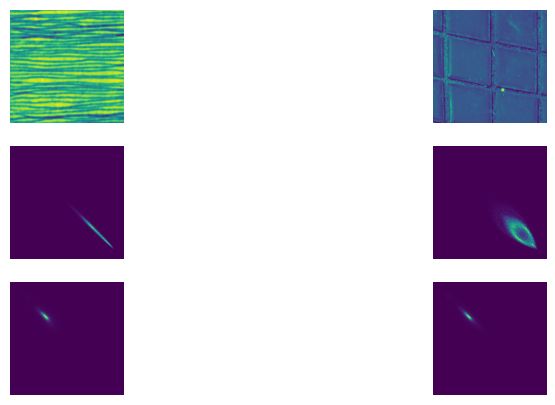

In [4]:
plt.figure(figsize=(10, 5))
plt.subplot(321), plt.imshow(a5), plt.axis('off') 
plt.subplot(322), plt.imshow(b5) , plt.axis('off')
plt.subplot(323), plt.imshow(glcm_a5_3_0), plt.axis('off') 
plt.subplot(324), plt.imshow(glcm_a5_3_90) , plt.axis('off')
plt.subplot(325), plt.imshow(glcm_b5_3_0), plt.axis('off') 
plt.subplot(326), plt.imshow(glcm_b5_3_90) , plt.axis('off')

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
[[-0.25  0.    0.25]
 [-0.5   0.    0.5 ]
 [-0.25  0.    0.25]]
[[-0.25  0.5  -0.25]
 [-0.5   1.   -0.5 ]
 [-0.25  0.5  -0.25]]
[[-0.25 -0.5  -0.25]
 [ 0.    0.    0.  ]
 [ 0.25  0.5   0.25]]
[[ 1  0 -1]
 [ 0  0  0]
 [-1  0  1]]
[[ 1 -2  1]
 [ 0  0  0]
 [-1  2 -1]]
[[-0.25 -0.5  -0.25]
 [ 0.5   1.    0.5 ]
 [-0.25 -0.5  -0.25]]
[[ 1  0 -1]
 [-2  0  2]
 [ 1  0 -1]]
[[ 1 -2  1]
 [-2  4 -2]
 [ 1 -2  1]]


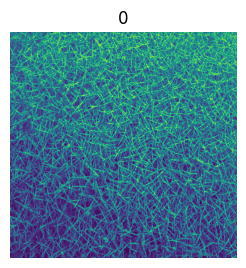

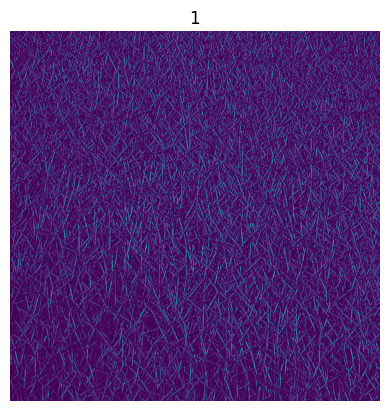

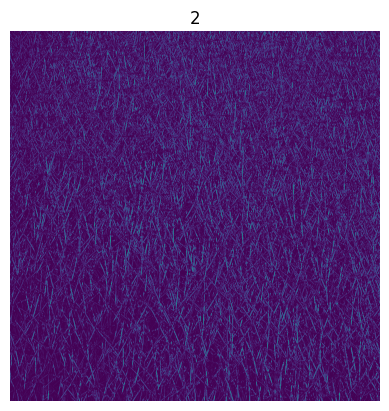

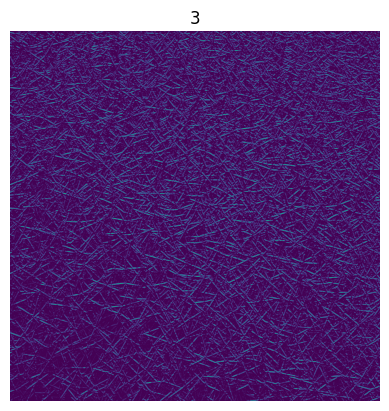

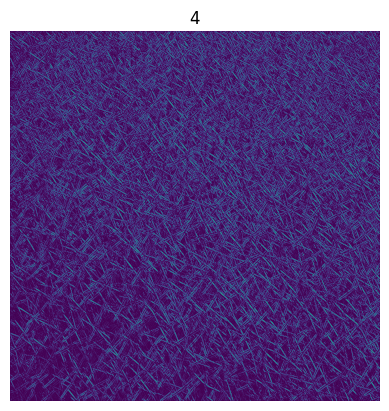

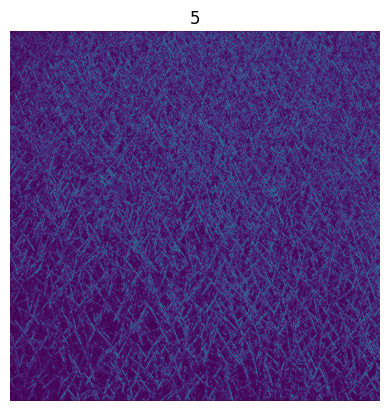

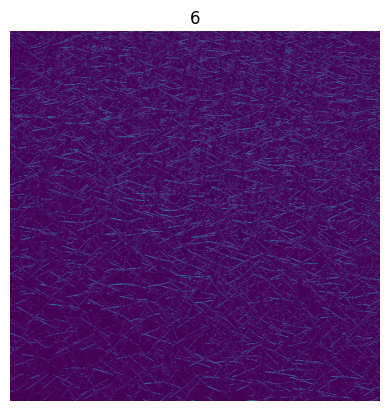

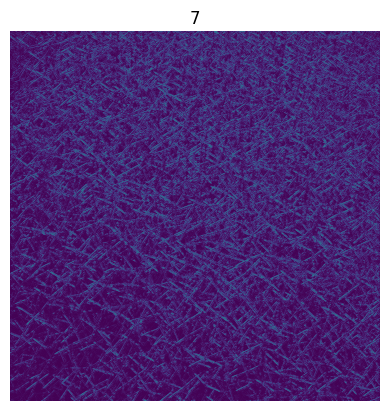

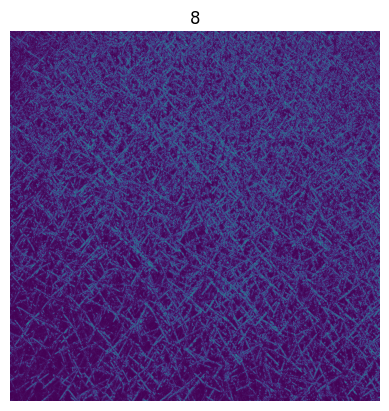

The original image power c =  12783.794319152832
The power of c 0 th filter response = 11494.777777671814
The power of c 1 th filter response = 1757.9039726257324
The power of c 2 th filter response = 1735.262674331665
The power of c 3 th filter response = 1314.157166481018
The power of c 4 th filter response = 3160.2816953659058
The power of c 5 th filter response = 3860.060046195984
The power of c 6 th filter response = 884.3464765548706
The power of c 7 th filter response = 2622.840732574463
The power of c 8 th filter response = 4172.190396308899


In [5]:
# CW2 Question 2

# utils to get law filter, and am_power function
L = np.array([1,2,1]) / 4
# or: L = np.array([1,2,1])
E = np.array([-1,0,1])
S = np.array([-1,2,-1])
llist = [L, E, S]

laws = []
for xs in llist:
    for ys in llist:
        xs= np.reshape(xs,(3,1))
        ys = np.reshape(ys,(1,3))
        L3L3 = np.matmul(xs,ys)  
        print(L3L3)
        laws.append(L3L3)

# function to compute the image power. input could be graylevel or color. 
#
def am_power(a):
    dim1 = a.shape
    
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]        
    pa = np.sum( a ** 2.0) / sz    
    
    return pa

# Create figure 
fig = plt.figure(figsize = (10, 10))

c = cv2.imread('../CS4243_2023_images_small/IMG_0054_1024bw.bmp', 0)
# d = cv2.imread('../CS4243_2023_images_small/6ae-007_1024_bw.bmp', 0)

image_power=[]
feature=[]
# setting values to rows and column variables
rows = 3
columns = 3

for i in range(9):
    f1 = cv2.filter2D(src=c, ddepth=-1, kernel= laws[i])
    fig.add_subplot(rows, columns, i+1) 
    # showing image
    plt.imshow(f1)
    plt.axis('off')
    plt.title(i)
    plt.show()
    image_power.append(am_power(f1))
    feature.append(f1)

print('The original image power c = ', am_power(c))
for i in range(9):
    print('The power of c', i, 'th filter response =', image_power[i])

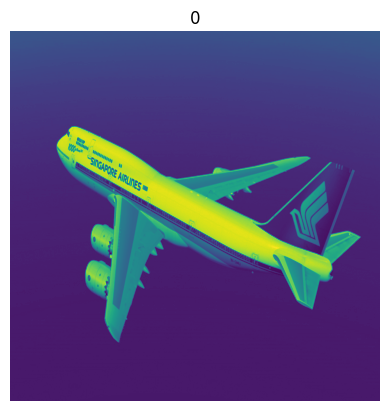

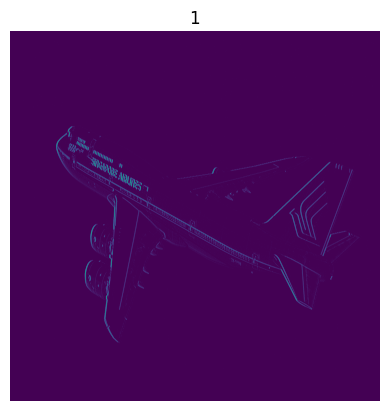

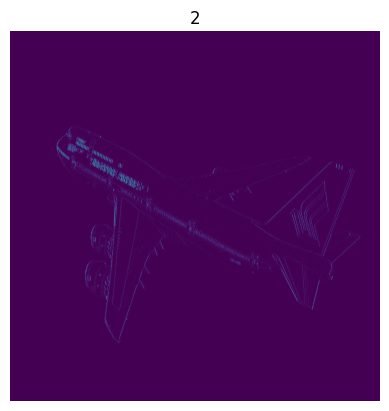

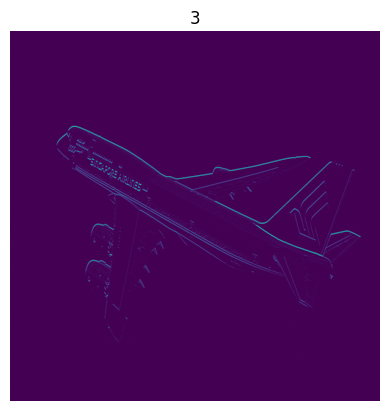

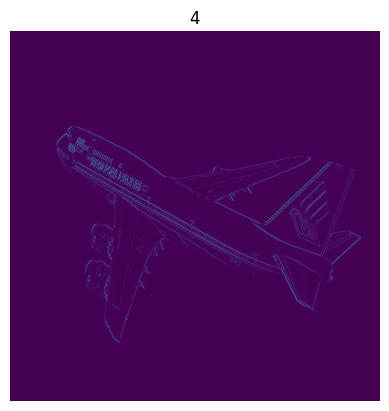

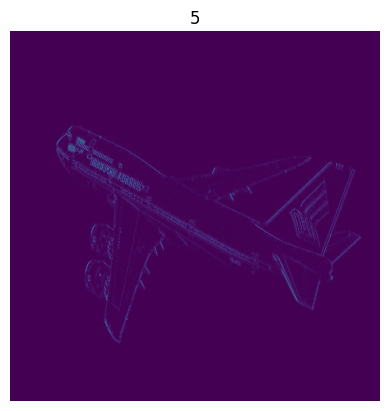

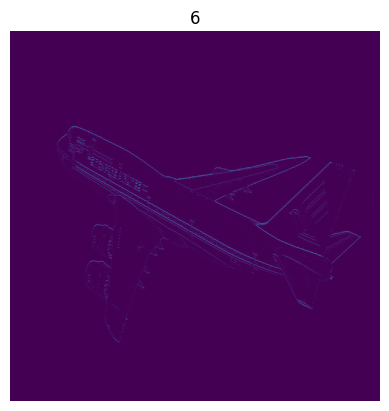

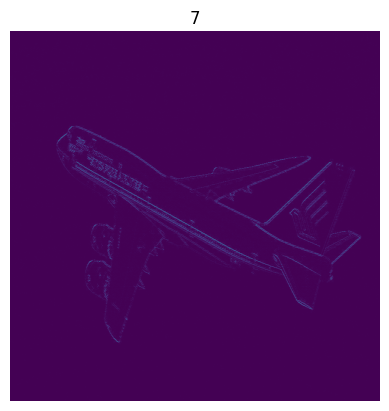

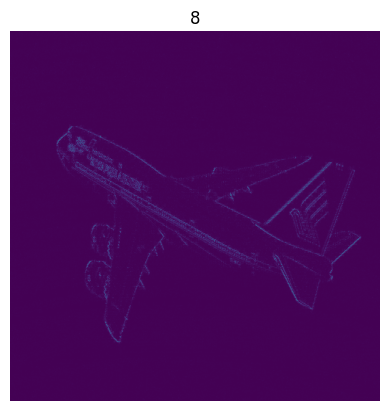

The original image power d =  5660.925362586975
The power of d 0 th filter response = 5602.862588882446
The power of d 1 th filter response = 96.26849269866943
The power of d 2 th filter response = 64.30005741119385
The power of d 3 th filter response = 77.33382987976074
The power of d 4 th filter response = 110.96645927429199
The power of d 5 th filter response = 96.80512428283691
The power of d 6 th filter response = 24.02619171142578
The power of d 7 th filter response = 77.65265083312988
The power of d 8 th filter response = 85.41726398468018


In [6]:
d = cv2.imread('../CS4243_2023_images_small/6ae-007_1024_bw.bmp', 0)

image_power=[]
feature=[]
# setting values to rows and column variables
rows = 3
columns = 3

for i in range(9):
    f1 = cv2.filter2D(src=d, ddepth=-1, kernel= laws[i])
    fig.add_subplot(rows, columns, i+1) 
    # showing image
    plt.imshow(f1)
    plt.axis('off')
    plt.title(i)
    plt.show()
    image_power.append(am_power(f1))
    feature.append(f1)

print('The original image power d = ', am_power(d))
for i in range(9):
    print('The power of d', i, 'th filter response =', image_power[i])

In [7]:
# stdout results:
# The original image power c =  12783.794319152832
# The power of c 0 th filter response = 11494.777777671814
# The power of c 1 th filter response = 1757.9039726257324
# The power of c 2 th filter response = 1735.262674331665
# The power of c 3 th filter response = 1314.157166481018
# The power of c 4 th filter response = 3160.2816953659058
# The power of c 5 th filter response = 3860.060046195984
# The power of c 6 th filter response = 884.3464765548706
# The power of c 7 th filter response = 2622.840732574463
# The power of c 8 th filter response = 4172.190396308899

# The original image power d =  5660.925362586975
# The power of d 0 th filter response = 5602.862588882446
# The power of d 1 th filter response = 96.26849269866943
# The power of d 2 th filter response = 64.30005741119385
# The power of d 3 th filter response = 77.33382987976074
# The power of d 4 th filter response = 110.96645927429199
# The power of d 5 th filter response = 96.80512428283691
# The power of d 6 th filter response = 24.02619171142578
# The power of d 7 th filter response = 77.65265083312988
# The power of d 8 th filter response = 85.41726398468018  

# The answer to CW2 Q2 is (a) ?

In [8]:
#CW2 Q3 
x = cv2.imread('../CS4243_2023_images_small/34.jpg', 0)
y = cv2.imread('../CS4243_2023_images_small/68.jpg', 0)
# print(x.shape, y.shape)

# util functions
lp_filter = np.array([[0.111, 0.111, 0.111], [0.111, 0.111, 0.111], [0.111, 0.111, 0.111]])
hp_filter = -np.ones((3, 3))
hp_filter[1, 1] = 8
# print(lp_filter)
# print(hp_filter)

# print(am_power(x))

# apply lp, hp filters
hp_x = cv2.filter2D(src = x, ddepth = -1, kernel = hp_filter)
lp_x = cv2.filter2D(src = x, ddepth=-1, kernel = lp_filter)

hp_y = cv2.filter2D(src = y, ddepth = -1, kernel = hp_filter)
lp_y = cv2.filter2D(src = y, ddepth=-1, kernel = lp_filter)

p_x = am_power(x)
p_y = am_power(y)

p_lp_x = am_power(lp_x)
p_hp_x = am_power(hp_x)
p_lp_y = am_power(lp_y)
p_hp_y = am_power(hp_y)


print('power of flpx= %e \t Percentage: %5.2f' %(p_lp_x , p_lp_x/am_power(x)*100 ) )  
print('power of fhpx= %e \t Percentage: %5.2f' %(p_hp_x , p_hp_x/am_power(x)*100 ) )
print('power of flpy= %e \t Percentage: %5.2f' %(p_lp_y, p_lp_y/am_power(y)*100 ) )
print('power of fhpy= %e \t Percentage: %5.2f' %(p_hp_y , p_hp_y /am_power(y)*100 ) )

xd = cv2.resize(x, None, fx = 0.25, fy = 0.25, interpolation=cv2.INTER_LINEAR)
yd = cv2.resize(y, None, fx = 0.25, fy = 0.25, interpolation=cv2.INTER_LINEAR)

hp_xd = cv2.filter2D(src = xd, ddepth = -1, kernel = hp_filter)
lp_xd = cv2.filter2D(src = xd, ddepth= -1, kernel = lp_filter)

hp_yd = cv2.filter2D(src = yd, ddepth = -1, kernel = hp_filter)
lp_yd = cv2.filter2D(src = yd, ddepth= -1, kernel = lp_filter)

p_lp_xd = am_power(lp_xd)
p_hp_xd = am_power(hp_xd)
p_lp_yd = am_power(lp_yd)
p_hp_yd = am_power(hp_yd)
print("---------------------------------")

print('power of flpx= %e \t Percentage: %5.2f' %(p_lp_xd , p_lp_xd/am_power(xd)*100 ) )  
print('power of fhpx= %e \t Percentage: %5.2f' %(p_hp_xd , p_hp_xd/am_power(xd)*100 ) )
print('power of flpy= %e \t Percentage: %5.2f' %(p_lp_yd, p_lp_yd/am_power(yd)*100 ) )
print('power of fhpy= %e \t Percentage: %5.2f' %(p_hp_yd , p_hp_yd /am_power(yd)*100 ) )

# Answer to this question is (d) - ratio of P_hp_yd / P_yd much bigger than P_hp_y / P_y

Corrupt JPEG data: bad Huffman code


power of flpx= 2.001062e+04 	 Percentage: 99.78
power of fhpx= 2.183912e+02 	 Percentage:  1.09
power of flpy= 1.482550e+04 	 Percentage: 99.57
power of fhpy= 3.531668e+02 	 Percentage:  2.37
---------------------------------
power of flpx= 2.001320e+04 	 Percentage: 99.65
power of fhpx= 7.503192e+02 	 Percentage:  3.74
power of flpy= 1.477678e+04 	 Percentage: 98.70
power of fhpy= 2.755522e+03 	 Percentage: 18.41


In [9]:
# Question 5
# Time interval between these 2 is 2.5s
# Real size of each pixel is 5x5cm
fr11 = cv2.imread('../CS4243_2023_images_small/fr11.png', 0)
fr12 = cv2.imread('../CS4243_2023_images_small/fr12.png', 0)

# function to keep the valid part after convolution 
def am_valid_part(a,N):
    cff = int(N/2)
    M = a.shape
    if len(M)==3:
        return a[cff:M[0]-cff, cff:M[1]-cff, :]
    else:
        return a[cff:M[0]-cff, cff:M[1]-cff]

def ready_2_show(a, level=255):
    a = ( a - np.min(a) ) / (np.max(a) - np.min(a)) 
    a = a * level
    return np.uint8(a)

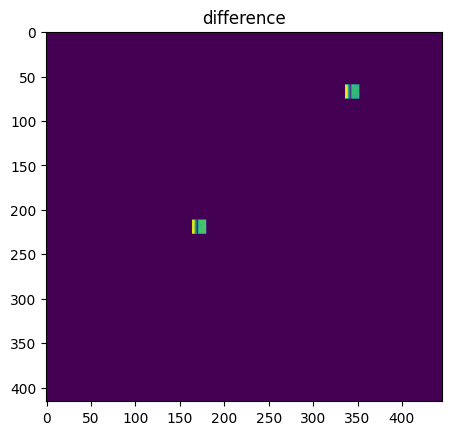

In [10]:
# computing the absolute difference between frames
diffp = (fr11*1.0 - fr12*1.0) 
diffp = abs( diffp )
# showing the results: absolute difference, suggests the motion
# cv2.namedWindow("difference", cv2.WINDOW_NORMAL)
# cv2.imshow('difference', diffp)

plt.title('difference')
plt.imshow(diffp)